## Descriptive Statistics


In this class we will review the most commonly used descriptive data summaries using an example.

The following code will download a dataset that was collected through a survey of mall customers. The dataset contains the following columns:

- *height* (numeric): Height in inches (1 inch = 2.54 cm)
- *weight* (numeric): Weight in pounds (1 pound $\approx$ 0.45 kilograms)
- *male* (numeric): 1: Male, 0: Female
- *earn* (numeric): Annual income in USD
- *earnk* (numeric): Annual income in 1,000 USD
- *ethnicity* (character): Ethnicity
- *age* (numeric): Age

In [2]:
# Load the libraries

import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
customers = pd.read_csv('https://github.com/febse/data/raw/main/econ/earnings.csv')
customers.head()

,height,weight,male,earn,earnk,ethnicity,education,mother_education,father_education,walk,exercise,smokenow,tense,angry,age
0,74,210.0,1,50000.0,50.0,White,16.0,16.0,16.0,3,3,2.0,0.0,0.0,45
1,66,125.0,0,60000.0,60.0,White,16.0,16.0,16.0,6,5,1.0,0.0,0.0,58
2,64,126.0,0,30000.0,30.0,White,16.0,16.0,16.0,8,1,2.0,1.0,1.0,29
3,65,200.0,0,25000.0,25.0,White,17.0,17.0,NaN,8,1,2.0,0.0,0.0,57
4,63,110.0,0,50000.0,50.0,Other,16.0,16.0,16.0,5,6,2.0,0.0,0.0,91


In [4]:
customers.shape

(1816, 15)

In [5]:
# Print the names of the columns
customers.columns

Index(['height', 'weight', 'male', 'earn', 'earnk', 'ethnicity', 'education',
       'mother_education', 'father_education', 'walk', 'exercise', 'smokenow',
       'tense', 'angry', 'age'],
      dtype='object')

The dataset `customers` contains 1816 observations (customers) and 15 variables (columns). We will focus on the variables *height* and *weight* for now. 
We want to understand the characteristics of the customers in terms of their height and weight. It is extremely difficult to process and understand the raw
data directly, because we must think about $2 \times 1816 = 3632$ numbers. Therefore, we need to reduce the data to a few numbers that we can reason about. This is the goal of descriptive statistics.

For this course we aim to understand mainly two things about a single variable:
- What is the center of the data?
- How spread out is the data? (Meaning how different are the customers from each other with respect to height, for example)

The most important summary statistic (a function of the data) is the sample (empirical) mean, also known as the arithmetic average.
Let's say that a dataset contains $n$ observations of a variable $x$: $x_1$ being the value of the variable for the first observation (customer), 
$x_2$ being the value of the variable for the second observation, and so on, until $x_n$ is the value of the variable for the last observation.
If we take $x$ to represent the height of our customers, then $n = 1816$ and $x_i$ is the height of the $i$-th customer.

For example, the height of the second customer is $x_2 = 66$ inches.

:::{#def-sample-mean}
## Sample Mean

For a set of numeric values $x_1, x_2, \ldots x_n$ the sample mean is defined as the sum of these values divided by the number of values:

$$
\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

The sum $\sum$ is just a shorthand for adding up all the values. You can write the sum explicitly as:

$$
\bar{x} = \frac{x_1 + x_2 + \ldots + x_n}{n}
$$

:::

:::{#exm-sample-mean}
## Sample Mean

Let's calculate the sample mean of the height of the first three customers. $x_1 = 74, x_2 = 66, x_3 = 64$.

$$
\frac{74 + 66 + 64}{3} = 68
$$

:::


In [6]:
# Extract the height of the second customer
# Remember that the index is 0-based, so the second customer has index 1
customers["height"][1]

66

In [7]:
# Extract the heights of the first three customers
# Remember that indexing is exclusive, so the last index is not included
customers["height"][:3]

0    74
1    66
2    64
Name: height, dtype: int64

In [8]:
# Calculate the average height of the first three customers
customers["height"][:3].mean()

68.0

Now calculate the sample mean of all customers in the dataset.

In [9]:
print(customers["height"].mean())
print(np.mean(customers["height"]))

66.56883259911895
66.56883259911895


## Spread

The second characteristic of a variable that we want to understand is how spread out the data is (how different, heterogeneous, the customers are with respect to height, for example). The concept of spread is abstract and can be interpreted in different ways. For example, we can think of spread as the average distance of the customers to the mean. This is the concept of variance.

:::{#def-sample-variance}
## Sample Variance and Sample Standard Deviation

For a set of numeric values $x_1, x_2, \ldots x_n$ the sample variance is defined as the average of the squared differences between each value and the sample mean:

$$
S^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2
$$

where $\bar{x}$ is the sample mean.

The sample standard deviation is the square root of the sample variance:

$$
S = \sqrt{S^2}
$$

:::

:::{#exm-sample-variance}
## Sample Variance and Sample Standard Deviation

Let's calculate the sample variance and sample standard deviation of the height of the first three customers. $x_1 = 74, x_2 = 66, x_3 = 64$.

First, we calculate the sample mean: $\bar{x} = 68$ (see @exm-sample-mean)

Then, we calculate the squared differences between each value and the sample mean:

$$
S^2 = \frac{(74 - 68)^2 + (66 - 68)^2 + (64 - 68)^2}{3-1} = \frac{36 + 4 + 16}{2} = 28
$$

Once we have the standard deviation, we can calculate the sample standard deviation:

$$
S = \sqrt{28} \approx 5.29
$$

:::

In [10]:
# Now let's calculate the variance using pandas

customers["height"][0:3].var()


28.0

In [11]:
# When using numpy, note that you will get a different result

np.var(customers["height"][0:3])

18.666666666666668

The reason for this is by default `numpy` uses the so called population (or uncorrected) variance, which is defined as:

$$
S^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2
$$

The only difference is the denominator, which is $n$ instead of $n-1$. To get the sample variance, we need to set the parameter `ddof` (denominator degrees of freedom) to 1.

In [12]:
np.var(customers["height"][0:3], ddof=1)

28.0

In [13]:
# Now the standard deviation

customers["height"][0:3].std()

5.291502622129181

In [14]:
np.std(customers["height"][0:3], ddof=1)

5.291502622129181

## Other Measures of Location and Spread

Reducing the to a single number as the sample average is very useful, because we can easily think about it (only one value). However, this reduction 
ignores a lot of detail about the customers. For example, we don't know how many customers are close to the average, how many are far away, and so on.
The standard deviation helps us understand this, but it is still a single number.

To further our understanding of the data, we can use other measures of location and spread.

- The median is the value that separates the data into two equal halves. It is the value that has the same number of observations above and below it. You can say that about half of the observations have a value less than the median and about the other half have a value greater than the median. Another name for the median is the second quartile (Q2). This comes from dividing the sample in four parts. Yet another name for the median is the 50th percentile (dividing the sample in 100 parts) or the 0.5 quantile.
- The first quartile (Q1) is the value that separates the first 25% of the data from the rest. You can say that roughly 25% of the observations have a value less than Q1 and 75% have a value greater than Q1. Another name for the first quartile is the 25th percentile or the 0.25 quantile.
- The second quartile (Q2) is the median.
- The third quartile (Q3) is the value that separates the first 75% of the data from the rest. You can say that roughly 75% of the observations have a value less than Q3 and 25% have a value greater than Q3. Another name for the third quartile is the 75th percentile or the 0.75 quantile.
- The maximum is the largest value in the data. It is sometimes called the 100th percentile.
- The minimum is the smallest value in the data. It is sometimes called the 0th percentile.

There are a couple of summaries that help us understand the spread of the data that are based on the quartiles:
- The range is the difference between the maximum and minimum values of the data: $range = max - min$.
- The inter-quartile range (IQR) is the difference between the third and first quartiles: $IQR = Q3 - Q1$. It is a measure of the spread of the middle 50% of the data.

In [15]:
# Let's calculate the median, Q1, and Q3 using pandas. It also outputs the minimum and maximum values as well as the count of non-missing values
# and the number of unique values

customers["height"].describe()

count    1816.000000
mean       66.568833
std         3.831822
min        57.000000
25%        64.000000
50%        66.000000
75%        69.250000
max        82.000000
Name: height, dtype: float64

In [16]:
print(customers["height"].min())
print(customers["height"].quantile(0.25))
print(customers["height"].quantile(0.5))
print(customers["height"].quantile(0.75))
print(customers["height"].max())

57
64.0
66.0
69.25
82


### Graphical Summaries

Although the numeric summaries are very useful, a visual representation of the data can be extremely powerful, because the 
human brain is very good at picking up visual patterns. The most common graphical summaries are histograms, kernel density plots and boxplots.

- A histogram is a bar plot that shows the frequency of the data in different intervals. It is a way to visualize the distribution of the data. The visualization 
depends on how we group values together in intervals (bins). Setting the value for the bins too high will make the histogram very noisy, because it will effectively plot every single observation. Setting the value for the bins too low will make the histogram too smooth, because it will group too many observations together. The default value for the bins is 10. In practice you should try different values to see which one gives you the best visualization. It should highlight features of the data that you are interested in.

/home/amarov/anaconda3/envs/econ2024/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='height', ylabel='Count'>

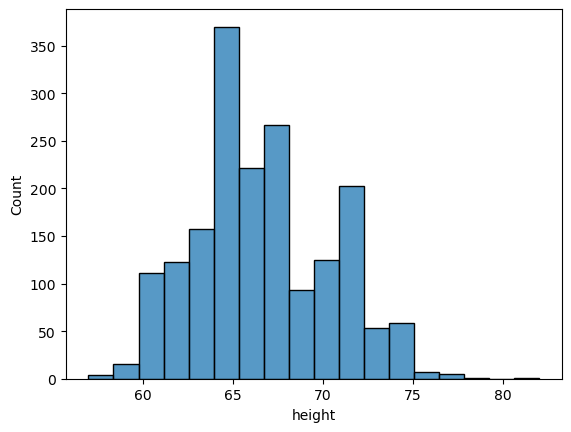

In [17]:
sns.histplot(customers["height"], bins=18)

Another way to visualize the distribution of the data is the kernel density plot. It is a smoothed version of the histogram. Instead of using bins to group the data, the kernel density plot uses a kernel to estimate the probability density function of the data. This topic is beyond the scope of this course, but it is important to know that the kernel density plot is a smoothed version of the histogram.

/tmp/ipykernel_111096/696753787.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(customers["height"], shade=True)
/home/amarov/anaconda3/envs/econ2024/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='height', ylabel='Density'>

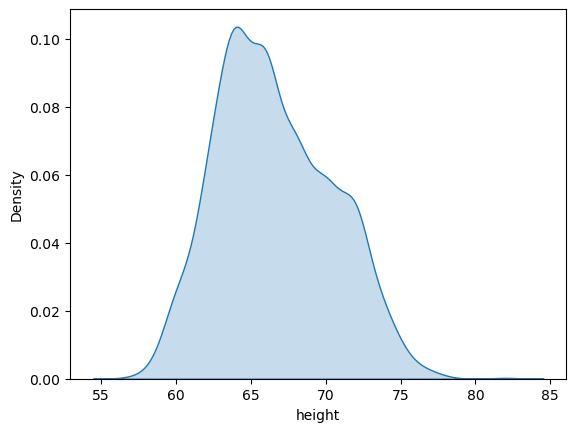

In [18]:
sns.kdeplot(customers["height"], shade=True)

### Boxplot

The boxplot was created as a way to easily spot unusual observations in the data. It is a graphical representation of the quantiles of the data. 
The boxplot is a way to visualize the median, the quartiles.


<Axes: >

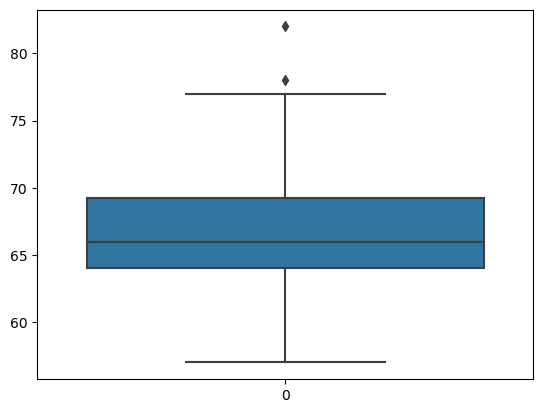

In [19]:
sns.boxplot(customers["height"])

The boxplot is very useful when comparing the distributions of different groups. For example, let's say that we want to compare the annual income 
of the customers by their gender.

In [20]:
customers["gender"] = pd.Categorical(customers["male"], categories=[0, 1], ordered=False)

Sometimes the picture becomes hard to read if there are extreme values if the data. In the previous example there are a few customers with very high annual income.
This stretches the x-axis and obscures the boxplot. One way to deal with this is to zoom in on the center of the data by setting the limits of the x-axis.

/home/amarov/anaconda3/envs/econ2024/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='earnk', ylabel='gender'>

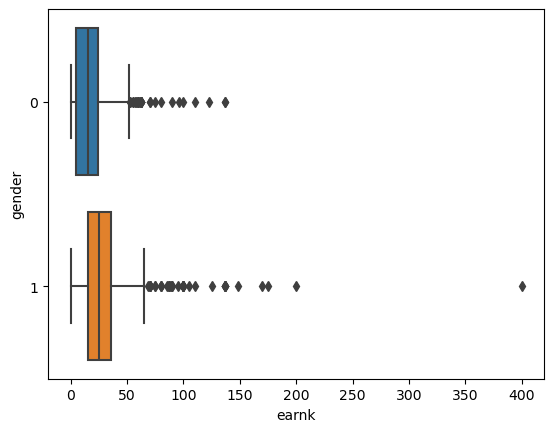

In [21]:
#
sns.boxplot(x="earnk", y="gender", data=customers)

/home/amarov/anaconda3/envs/econ2024/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


(0.0, 75.0)

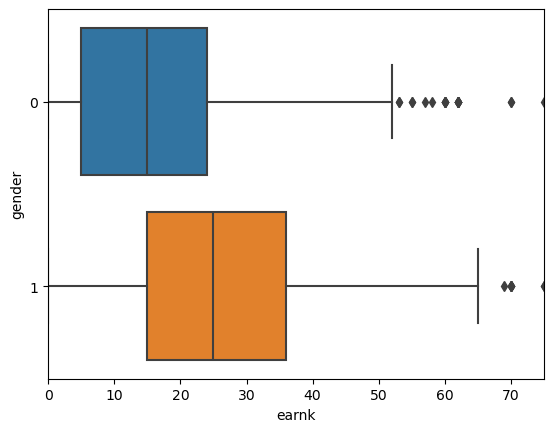

In [22]:
#
ax = sns.boxplot(x="earnk", y="gender", data=customers)
ax.set_xlim((0, 75))

In [23]:
### Violin Plot


/home/amarov/anaconda3/envs/econ2024/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='earnk', ylabel='gender'>

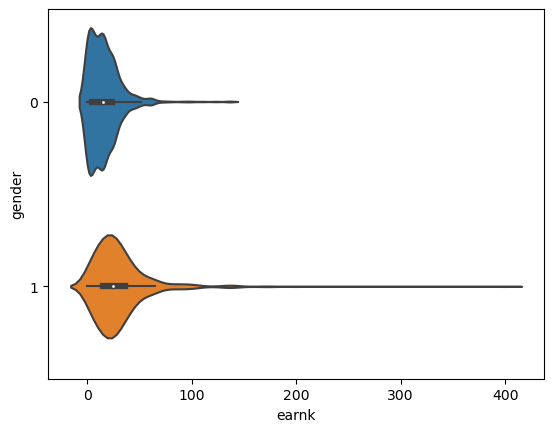

In [25]:
sns.violinplot(x="earnk", y="gender", data=customers)

### Bivariate Data

The previous summaries are useful when we want to understand a single variable. However, we often want to understand the relationship between two variables.
For example, we might want to understand the relationship between the height and weight of the customers. We will take this example, because we already have 
a lot of experience with the height (because of daily life) (XXX, w).

The most basic and most important tool for understanding the relationship between two variables is the scatter plot. This is a plot where each point represents
a pair of values of the two variables. For example, the first point in the scatter plot of height and weight represents the height and weight of the first customer.
The second point represents the height and weight of the second customer, and so on.


<Axes: xlabel='height', ylabel='earnk'>

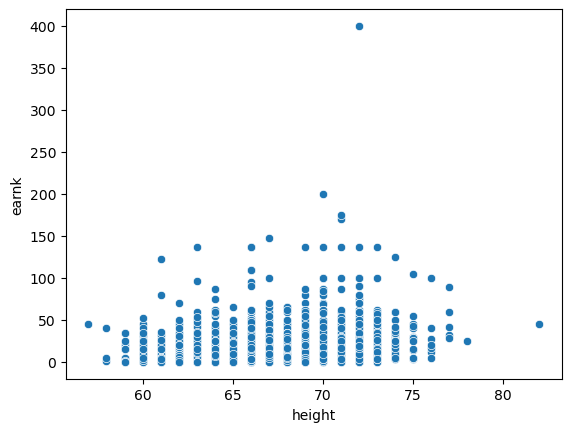

In [38]:
sns.scatterplot(x="height", y="earnk", data=customers)

When we have a lot of data points, the scatter plot can become very hard to read, because the points overlap (this is called overplotting). One way to deal with this is to use make the points smaller and transparent so that we can focus on the overall pattern of the data. When there is a lot of rounding in the data (the height is rounded to the nearest inch in our example) we will see a lot of points in the same location. This is the reason we are seeing vertical lines in the scatter plot above. One way to deal with this is to add a little bit of random noise to the data. This is called jittering.


/home/amarov/anaconda3/envs/econ2024/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/amarov/anaconda3/envs/econ2024/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='height', ylabel='weight'>

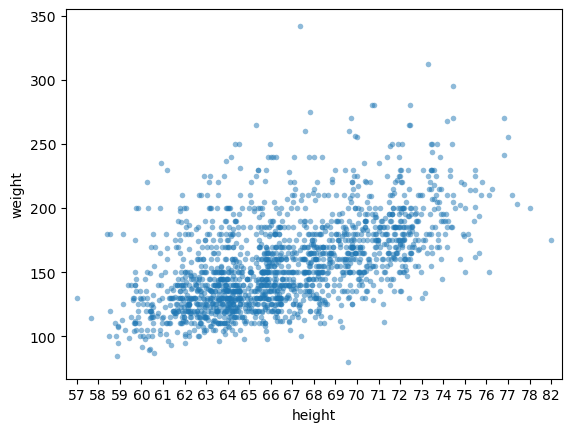

In [45]:
sns.stripplot(
    x="height",
    y="weight",
    data=customers,
    jitter=0.5,
    alpha=0.3,
    size=4
)